# Collect and Explore Data

In [3]:
import pandas as pd
import os
import numpy as np

In [4]:
convertTable = dict()
convertTable['Zip Code'] = str
df = pd.read_csv ('Telco_customer_churn.csv', dtype = convertTable)
df['Total Charges'] = pd.to_numeric(df['Total Charges'] , errors='coerce')
df[df['Total Charges'].isnull()==True]
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


### Missing Value 

In [5]:
# Calculate the percentage of missing values 
missing_values = df.isnull().sum()
missing_values_percentage = 100 * missing_values / len(df)
missing_values_table = pd.concat([missing_values, missing_values_percentage], axis=1)
missing_values_table = missing_values_table.rename(columns = {0 : 'Missing Values', 1 : '% of Missing Values'})
missing_values_table = missing_values_table[missing_values_table.iloc[:,0] != 0].sort_values('% of Missing Values', ascending=False).round(1)
missing_values_table

,Missing Values,% of Missing Values
Churn Reason,5174,73.5
Total Charges,11,0.2


In [6]:
# drop missing value
df = df.drop(['Churn Reason'], axis=1)
df.dropna(how = 'any', inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7032 non-null   object 
 1   Count              7032 non-null   int64  
 2   Country            7032 non-null   object 
 3   State              7032 non-null   object 
 4   City               7032 non-null   object 
 5   Zip Code           7032 non-null   object 
 6   Lat Long           7032 non-null   object 
 7   Latitude           7032 non-null   float64
 8   Longitude          7032 non-null   float64
 9   Gender             7032 non-null   object 
 10  Senior Citizen     7032 non-null   object 
 11  Partner            7032 non-null   object 
 12  Dependents         7032 non-null   object 
 13  Tenure Months      7032 non-null   int64  
 14  Phone Service      7032 non-null   object 
 15  Multiple Lines     7032 non-null   object 
 16  Internet Service   7032 

# EDA

In [8]:
df_eda = df.copy()
df_eda.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [9]:
df_eda = df_eda.drop(columns=['Count'])
df_corr = df_eda[['Gender','Senior Citizen','Partner','Dependents','Tenure Months',
                  'Phone Service','Multiple Lines','Internet Service','Online Security',
                  'Online Backup','Device Protection','Tech Support','Streaming TV',
                  'Streaming Movies','Contract','Paperless Billing','Payment Method',
                  'Monthly Charges','Total Charges','Churn Value']]
df_corr.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [10]:
print('Gender')
print(set(df_corr['Gender']))

print('Senior Citizen')
print(set(df_corr['Senior Citizen']))

print('Partner')
print(set(df_corr['Partner']))

print('Dependents')
print(set(df_corr['Dependents']))

print('Phone Service')
print(set(df_corr['Phone Service']))

print('Multiple Lines')
print(set(df_corr['Multiple Lines']))

print('Internet Service')
print(set(df_corr['Internet Service']))

print('Online Security')
print(set(df_corr['Online Security']))

print('Online Backup')
print(set(df_corr['Online Backup']))

print('Device Protection')
print(set(df_corr['Device Protection']))

print('Tech Support')
print(set(df_corr['Tech Support']))

print('Streaming TV')
print(set(df_corr['Streaming TV']))

print('Streaming Movies')
print(set(df_corr['Streaming Movies']))

print('Contract')
print(set(df_corr['Contract']))

print('Paperless Billing')
print(set(df_corr['Paperless Billing']))

print('Payment Method')
print(set(df_corr['Payment Method']))

Gender
{'Male', 'Female'}
Senior Citizen
{'Yes', 'No'}
Partner
{'Yes', 'No'}
Dependents
{'Yes', 'No'}
Phone Service
{'Yes', 'No'}
Multiple Lines
{'Yes', 'No', 'No phone service'}
Internet Service
{'No', 'Fiber optic', 'DSL'}
Online Security
{'No internet service', 'Yes', 'No'}
Online Backup
{'No internet service', 'Yes', 'No'}
Device Protection
{'No internet service', 'Yes', 'No'}
Tech Support
{'No internet service', 'Yes', 'No'}
Streaming TV
{'No internet service', 'Yes', 'No'}
Streaming Movies
{'No internet service', 'Yes', 'No'}
Contract
{'One year', 'Month-to-month', 'Two year'}
Paperless Billing
{'Yes', 'No'}
Payment Method
{'Bank transfer (automatic)', 'Mailed check', 'Electronic check', 'Credit card (automatic)'}


In [11]:
correlations = df_corr.corrwith(df_corr['Churn Value'])
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 Monthly Charges    0.192858
dtype: float64

Most Negative Correlations: 
 Total Charges   -0.199484
Tenure Months   -0.354049
dtype: float64


<ipython-input-22-5a1c1472beb5>:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<AxesSubplot:>

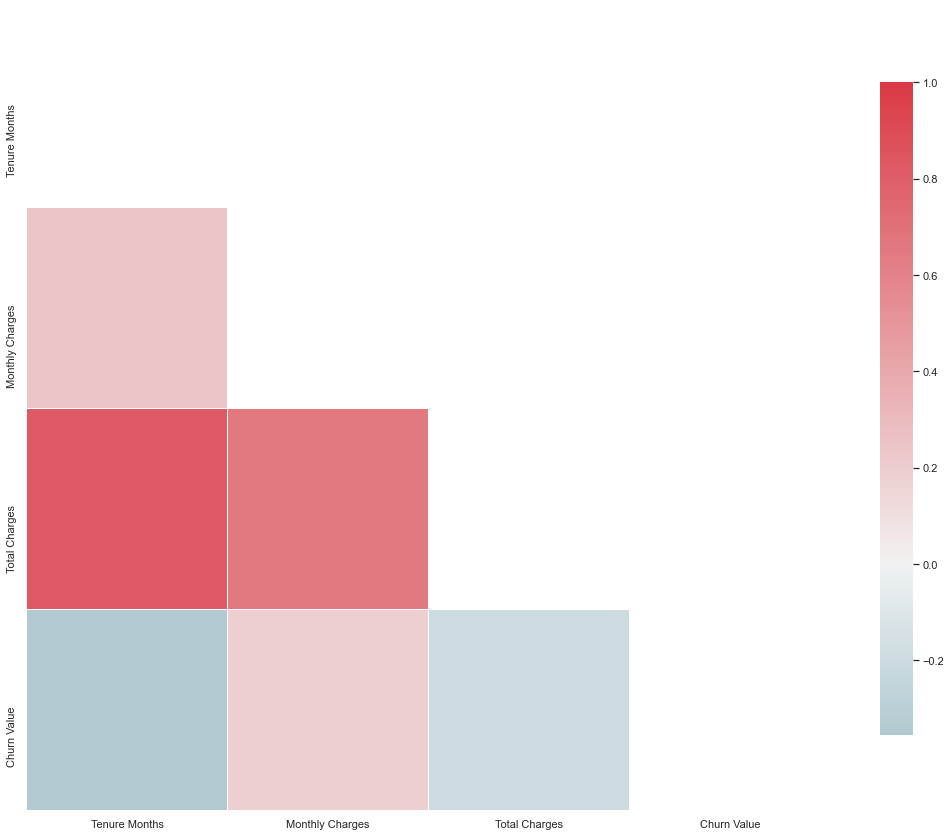

In [22]:
import seaborn as sn
import matplotlib.pyplot as plt   
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = df_corr.corr()

#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": 0.8})

In [23]:
import plotly.express as px
fig = px.histogram(df_eda, x="Tenure Months")
fig.show()

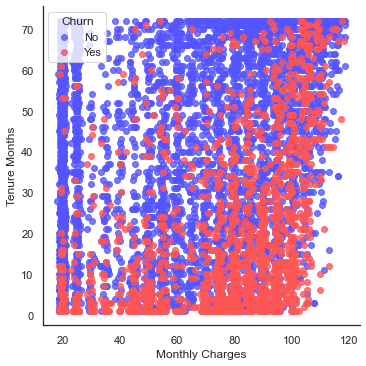

In [176]:
import seaborn as sns
ax = sns.lmplot(x="Monthly Charges", y="Tenure Months", 
                data=df, fit_reg=False, hue='Churn Value', legend=False,palette="seismic")
plt.legend(title='Churn', loc='upper left', labels=['No', 'Yes'])

In [158]:
import plotly.express as px

fig = px.scatter_mapbox(df_eda, lat="Latitude", 
                        lon="Longitude",
                        color="Churn Label",
                        color_discrete_map={"Yes": "#F75D59", "No": "#488AC7"},
                        hover_name="City", 
                        hover_data=["CustomerID"],
                        zoom=3, 
                        height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [26]:
df_eda.head()

,CustomerID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,3668-QPYBK,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,9237-HQITU,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,9305-CDSKC,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372
3,7892-POOKP,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,0280-XJGEX,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340


In [27]:
df_gen = df_eda.groupby(['Gender', 'Churn Label']).agg({'Churn Label': 'count'})
df_gen = df_gen.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_gen

Churn Label
Gender Churn Label             
Female No             73.040482
       Yes            26.959518
Male   No             73.795435
       Yes            26.204565

In [28]:
df_sn = df_eda.groupby(['Senior Citizen', 'Churn Label']).agg({'Churn Label': 'count'})
df_sn = df_sn.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
df_sn

Churn Label
Senior Citizen Churn Label             
No             No             76.349745
               Yes            23.650255
Yes            No             58.318739
               Yes            41.681261

In [157]:
import plotly.graph_objects as go
import numpy as np


labels = ["Female","Male","Age < 65","Age >= 65"]
widths = np.array([25,25,25,25])
colors = {'Churn: Yes':'#F75D59',
          'Churn: No':'#488AC7'}

data = {
    "Churn: No": [73.079128,73.839662,76.393832,58.318739],
    "Churn: Yes": [26.920872,26.160338,23.606168,41.681261]
}

fig = go.Figure()
for key in data:
    fig.add_trace(go.Bar(
        name=key,
        y=data[key],
        x=np.cumsum(widths)-widths,
        width=widths,
        offset=0,
        customdata=np.transpose([labels, widths*data[key]]),
        texttemplate="%{y} x %{width} =<br>%{customdata[1]}",
        textposition="inside",
        textangle=0,
        textfont_color="white",
        marker_color=colors[key],
        hovertemplate="<br>".join([
            "label: %{customdata[0]}",
            "width: %{width}",
            "height: %{y}",
            "area: %{customdata[1]}",
        ])
    ))

fig.update_xaxes(
    tickvals=np.cumsum(widths)-widths/2,
    ticktext= ["%s<br>%d" % (l, w) for l, w in zip(labels, widths)]
)


fig.update_layout(yaxis_title='Churn(%)', xaxis_title='Gender & Age')


fig.update_xaxes(range=[0,100])
fig.update_yaxes(range=[0,100])

fig.update_layout(
    title_text="Marimekko Chart",
    barmode="stack",
    uniformtext=dict(mode="hide", minsize=10)
)



In [30]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df_y = df_eda.copy()
df_y['tenure_year'] = pd.cut(df_y['Tenure Months'], range(1, 80, 12), right=False, labels=labels)
df_y['tenure_year'] = df_y['tenure_year'].replace({'1 - 12': 'firstyear','13 - 24': 'secondyear',
                             '25 - 36': 'thirdyear','37 - 48': 'fourthyear',
                             '49 - 60': 'fifthyear','61 - 72': 'sixthyear'})


df_y

,CustomerID,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,tenure_year
0,3668-QPYBK,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,firstyear
1,9237-HQITU,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,firstyear
2,9305-CDSKC,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,firstyear
3,7892-POOKP,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,thirdyear
4,0280-XJGEX,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,fifthyear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,No,...,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,sixthyear
7039,6840-RESVB,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,No,...,One year,Yes,Mailed check,84.80,1990.50,No,0,59,2140,secondyear
7040,2234-XADUH,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,No,...,One year,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,sixthyear
7041,4801-JZAZL,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,No,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,firstyear


In [144]:
# Split Violin Plot
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=df_y['tenure_year'][ df_y['Churn Label'] == 'Yes' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='positive',
                        line_color='#F75D59')
             )
fig.add_trace(go.Violin(x=df_y['tenure_year'][ df_y['Churn Label'] == 'No' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'No' ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='negative',
                        line_color='#488AC7')
             )
fig.update_xaxes(categoryorder='array', categoryarray= ['firstyear', 
                                                        'secondyear', 
                                                        'thirdyear', 
                                                        'fourthyear', 
                                                        'fifthyear',
                                                       'sixthyear'])
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.35, violinmode='overlay')
fig.update_layout(autosize=False,width=1000,height=600,)
fig.update_layout(xaxis_title="period used", yaxis_title="Monthly Charges", width=1000)
fig.show()

In [143]:
# Split Violin Plot
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Violin(x=df_y['Contract'][ df_y['Churn Label'] == 'Yes' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'Yes' ],
                        legendgroup='Yes', scalegroup='Yes', name='Yes',
                        side='positive',
                        line_color='#F75D59')
             )
fig.add_trace(go.Violin(x=df_y['Contract'][ df_y['Churn Label'] == 'No' ],
                        y=df_y['Monthly Charges'][ df_y['Churn Label'] == 'No' ],
                        legendgroup='No', scalegroup='No', name='No',
                        side='negative',
                        line_color='#488AC7')
             )
fig.update_xaxes(categoryorder='array', categoryarray= ['Month-to-month', 
                                                        'One year', 
                                                        'Two year'])
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0.35, violinmode='overlay')
fig.update_layout(autosize=False,width=1000,height=600,)
fig.update_layout(xaxis_title="Contract Types", yaxis_title="Monthly Charges", width=800)
fig.show()

In [33]:
df_ch = df_eda.groupby(['Senior Citizen', 'Churn Label']).agg({'Churn Label': 'count'})
df_ch.columns = ['customers']
df_ch = df_ch.reset_index()
df_ch

,Senior Citizen,Churn Label,customers
0,No,No,4497
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


In [141]:
import plotly.express as px
fig = px.histogram(df_ch, x="Senior Citizen", y="customers",
             color='Churn Label', barmode='group',
             height=400,
                   color_discrete_map={'Yes': '#F75D59', 'No': '#488AC7'})
fig.show()

# Logistic Regression (Full Model)

## 1. Prepare Data for Logistic Regression

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
# from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE 
%matplotlib inline

In [36]:
df_logis = df[['Churn Value','Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges']]
df_logis.head()

,Churn Value,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,1,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


0    5163
1    1869
Name: Churn Value, dtype: int64


C:\Users\kornc\Documents\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Churn Value', ylabel='count'>

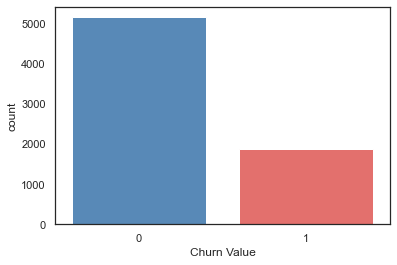

In [38]:
# check weight Churn Yes and No
churn_count = pd.value_counts(df_logis['Churn Value'])
print(churn_count)
sns.countplot(df_logis['Churn Value'], palette=['#488AC7',"#F75D59"])

In [39]:
# get dummy into dataframe
dummy_df_logis = pd.get_dummies(df_logis)
print(dummy_df_logis.columns)
dummy_df_logis.head()

Index(['Churn Value', 'Tenure Months', 'Monthly Charges', 'Total Charges',
       'Gender_Female', 'Gender_Male', 'Senior Citizen_No',
       'Senior Citizen_Yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'Phone Service_No', 'Phone Service_Yes',
       'Multiple Lines_No', 'Multiple Lines_No phone service',
       'Multiple Lines_Yes', 'Internet Service_DSL',
       'Internet Service_Fiber optic', 'Internet Service_No',
       'Online Security_No', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No',
       'Online Backup_No internet service', 'Online Backup_Yes',
       'Device Protection_No', 'Device Protection_No internet service',
       'Device Protection_Yes', 'Tech Support_No',
       'Tech Support_No internet service', 'Tech Support_Yes',
       'Streaming TV_No', 'Streaming TV_No internet service',
       'Streaming TV_Yes', 'Streaming Movies_No',
       'Streaming Movies_No internet service', 'Streaming Movies_

,Churn Value,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,1,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,8,99.65,820.50,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,1,28,104.80,3046.05,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
4,1,49,103.70,5036.30,0,1,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0


In [40]:
y = dummy_df_logis['Churn Value']
X = dummy_df_logis.drop('Churn Value', axis=1)

## 2. modeling 

### 2.1 compare accuracy rate "Non-Resampling Model" vs "Resampling Model"

#### "Non-Resampling Model"

In [43]:
# Min-Max Scaling [0,1]
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 100)

#Build model
logreg = LogisticRegression(class_weight={0:0.2,1:0.8},solver = 'liblinear',max_iter=100)
logreg.fit(X_train, y_train)

# predict future values
y_pred = logreg.predict(X_test)

# Confusion Matrix

from sklearn.metrics import confusion_matrix
# Pass actual test and predicted target test outcomes to function
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1006,  538],
       [  81,  485]], dtype=int64)

In [44]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))
print('accuracy score is: ', accuracy_score(y_test,y_pred))
print('roc auc score is: ', roc_auc_score(y_test,y_pred))
print('precision score is: ',precision_score(y_test,y_pred))
print('recall score is: ', recall_score(y_test,y_pred))


Accuracy of logistic regression classifier on test set: 0.71
accuracy score is:  0.7066350710900474
roc auc score is:  0.7542224317545176
precision score is:  0.47409579667644186
recall score is:  0.8568904593639576


#### "Resampling Model"

In [49]:
# แก้ปัญหา Imbalance classification ด้วยวิธีการ Oversampling
sm = SMOTE(random_state=100)
X_resampled, y_resampled = sm.fit_resample(X,y)

# Min-Max Scaling [0,1]
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = .3, random_state = 100)

#Build model
logreg_resam = LogisticRegression(class_weight={0:0.2,1:0.8},solver = 'liblinear',max_iter=100)
logreg_resam.fit(X_train, y_train)

# predict future values
y_pred_resam = logreg_resam.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred_resam)
cnf_matrix

array([[ 776,  777],
       [  64, 1481]], dtype=int64)

In [50]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_resam.score(X_test,y_test)))
print('accuracy score is: ', accuracy_score(y_test,y_pred_resam))
print('roc auc score is: ', roc_auc_score(y_test,y_pred_resam))
print('precision score is: ',precision_score(y_test,y_pred_resam))
print('recall score is: ', recall_score(y_test,y_pred_resam))

Accuracy of logistic regression classifier on test set: 0.73
accuracy score is:  0.7285345384118787
roc auc score is:  0.7291270471391628
precision score is:  0.6558901682905226
recall score is:  0.9585760517799353


# ** ตรงนี้เขียนสรุปให้สวยๆว่าทำไมเลือก resampling **

## 3. Evaluate Model

In [53]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_resam.score(X_test,y_test)))
print('accuracy score is: ', accuracy_score(y_test,y_pred_resam))
print('roc auc score is: ', roc_auc_score(y_test,y_pred_resam))
print('precision score is: ',precision_score(y_test,y_pred_resam))
print('recall score is: ', recall_score(y_test,y_pred_resam))
print(classification_report(y_test,y_pred_resam))

Accuracy of logistic regression classifier on test set: 0.73
accuracy score is:  0.7285345384118787
roc auc score is:  0.7291270471391628
precision score is:  0.6558901682905226
recall score is:  0.9585760517799353
              precision    recall  f1-score   support

           0       0.92      0.50      0.65      1553
           1       0.66      0.96      0.78      1545

    accuracy                           0.73      3098
   macro avg       0.79      0.73      0.71      3098
weighted avg       0.79      0.73      0.71      3098



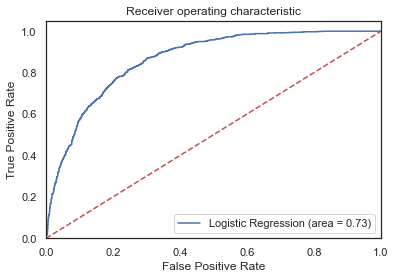

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg_resam.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg_resam.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 4. Improve Model

In [55]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#Hyperparameter tuning
# define model/create instance
lr=LogisticRegression(solver = 'liblinear',max_iter=100)

#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 
        'penalty': ['l2'],
        "class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 16, shuffle = True, random_state = 100)

#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,
                    param_grid=param, 
                    scoring="f1",
                    cv=folds,return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=16, random_state=100, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.1, 0.5, 1, 10, 15, 20],
                         'class_weight': [{0: 0.0, 1: 1.0},
                                          {0: 0.0019839679358717435,
                                           1: 0.9980160320641283},
                                          {0: 0.003967935871743487,
                                           1: 0.9960320641282565},
                                          {0: 0.0059519038076152305,
                                           1: 0.9940480961923848},
                                          {0: 0.00793587174348...
                                           1: 0.9543687374749499},
                                          {0: 0.047615230460921844,
                                           1: 0.9523847695390781},
                                          {0: 0.04959919839679359,


In [56]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.8035169292679244
Best hyperparameters:  {'C': 10, 'class_weight': {0: 0.3829058116232465, 1: 0.6170941883767536}, 'penalty': 'l2'}


In [57]:
#Building Model again with best params
lr2=LogisticRegression(class_weight={0:0.38,1:0.62},C=10,penalty="l2")
lr2.fit(X_train,y_train)

LogisticRegression(C=10, class_weight={0: 0.38, 1: 0.62})

In [60]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# Accuracy score
print('accuracy score is: ', accuracy_score(y_test,y_pred_test))
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

confusion Matrix is :nn [[1016  537]
 [ 149 1396]]
n
accuracy score is:  0.7785668173014848
ROC-AUC score  test dataset:  t 0.864623434755156
precision score  test dataset:  t 0.7221934816347646
Recall score  test dataset:  t 0.9035598705501618
f1 score  test dataset :  t 0.8027602070155262
              precision    recall  f1-score   support

           0       0.87      0.65      0.75      1553
           1       0.72      0.90      0.80      1545

    accuracy                           0.78      3098
   macro avg       0.80      0.78      0.78      3098
weighted avg       0.80      0.78      0.78      3098



# Logistic Regression (Reduced Model)

In [61]:
from sklearn.feature_selection import RFE

## 1. Prepare Data for Logistic Regression

In [62]:
df_logis_red = df[['Churn Value','Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges']]
df_logis_red.head()

,Churn Value,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,1,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
2,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50
3,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05
4,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30


In [63]:
dummy_logis_red = pd.get_dummies(df_logis_red)
dummy_logis_red.head()

,Churn Value,Tenure Months,Monthly Charges,Total Charges,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,1,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,1,8,99.65,820.50,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,1,28,104.80,3046.05,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
4,1,49,103.70,5036.30,0,1,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0


In [64]:
y = dummy_logis_red['Churn Value']
X = dummy_logis_red.drop('Churn Value', axis=1)

# resampling
sm = SMOTE(random_state=100)
X_resampled, y_resampled = sm.fit_resample(X,y)

#normalization
mm = MinMaxScaler()
X = pd.DataFrame(mm.fit_transform(X))


# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 100)

In [66]:
#Feature selection 
#Recursive feature elimination
from sklearn.feature_selection import RFE

classifier = LogisticRegression(penalty="l2",random_state=100,solver = 'liblinear',max_iter=100)

#Select best feature 
rfe = RFE(classifier, n_features_to_select=15)  #ลองเลือกตัวแปรอิสระมา 15 ตัว จาก 48 ตัว Categorical+Continuous Variables
rfe = rfe.fit(X_train, y_train)


#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
#ตัวแปรอิสระ 15 ตัวที่ถูกเลือก
print(X_train.columns[rfe.support_])


[ True False  True False False False False False False  True  True False
 False False False False  True False False False  True  True False  True
 False False  True False  True False False False False False  True False
 False  True False  True  True False False False  True False]
[ 1  4  1 20 19 25 26  8 28  1  1 31 21  3 30 22  1  5  2 12  1  1 32  1
 27 18  1 29  1  7 11  6  9 17  1 10 13  1 23  1  1 24 16 14  1 15]
Int64Index([0, 2, 9, 10, 16, 20, 21, 23, 26, 28, 34, 37, 39, 40, 44], dtype='int64')


In [67]:
df_select_red = dummy_logis_red.iloc[:,1:]
df_select_red = df_select_red.iloc[:,[0, 2, 9, 10, 16, 20, 21, 23, 26, 28, 34, 37, 39, 40, 44]]
cols = df_select_red.columns
cols

Index(['Tenure Months', 'Total Charges', 'Dependents_No', 'Dependents_Yes',
       'Internet Service_DSL', 'Online Security_No internet service',
       'Online Security_Yes', 'Online Backup_No internet service',
       'Device Protection_No internet service', 'Tech Support_No',
       'Streaming Movies_No', 'Contract_Month-to-month', 'Contract_Two year',
       'Paperless Billing_No', 'Payment Method_Electronic check'],
      dtype='object')

In [68]:
# เอาตัวแปรอิสระ 15 ตัวที่ถูกเลือกมาพิจารณาต่อด้วยการดูค่า p-value
y = dummy_logis_red['Churn Value']
X = dummy_logis_red[cols]

# Implementing the model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

C:\Users\kornc\Documents\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

C:\Users\kornc\Documents\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



Optimization terminated successfully.
         Current function value: 0.404215
         Iterations 8
                                            Results: Logit
Model:                           Logit                         Pseudo R-squared:              0.302    
Dependent Variable:              Churn Value                   AIC:                           5710.8743
Date:                            2022-04-14 19:06              BIC:                           5800.0312
No. Observations:                7032                          Log-Likelihood:                -2842.4  
Df Model:                        12                            LL-Null:                       -4071.7  
Df Residuals:                    7019                          LLR p-value:                   0.0000   
Converged:                       1.0000                        Scale:                         1.0000   
No. Iterations:                  8.0000                                                                
-------

In [69]:
#ตัดตัวแปรอิสระออก 4 ตัว ได้แก่ 
    #Dependents_No
    #Online Security_No internet service
    #Online Backup_No internet service
    #Device Protection_No internet service
#ที่ไม่มีผลต่อ Churn Value เนื่องจากค่า p-value > 0.05 
#จากนั้นเอาตัวแปรอิสระ 10 ตัวที่เหลือ มาพิจารณาต่อ
df_logis_red2 = dummy_logis_red[['Churn Value','Tenure Months','Total Charges','Dependents_Yes','Internet Service_DSL',
        'Online Security_Yes','Tech Support_No','Streaming Movies_No','Contract_Month-to-month',
        'Contract_Two year','Paperless Billing_No','Payment Method_Electronic check']]
    
y = df_logis_red2['Churn Value']
X = df_logis_red2.drop('Churn Value', axis=1)

import statsmodels.api as sm
logit_model2=sm.Logit(y,X)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.412308
         Iterations 8
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.288    
Dependent Variable:       Churn Value           AIC:                   5820.7012
Date:                     2022-04-14 19:08      BIC:                   5896.1417
No. Observations:         7032                  Log-Likelihood:        -2899.4  
Df Model:                 10                    LL-Null:               -4071.7  
Df Residuals:             7021                  LLR p-value:           0.0000   
Converged:                1.0000                Scale:                 1.0000   
No. Iterations:           8.0000                                                
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

In [70]:
#ตัดตัวแปรอิสระ'Streaming Movies_No'ออก 1 ตัว ที่ไม่มีผลต่อ Churn Value เนื่องจากค่า p-value > 0.05 
#จากนั้นเอาตัวแปรอิสระ 10 ตัวที่เหลือ มาพิจารณาต่อ
df_logis_red3 = dummy_logis_red[['Churn Value','Tenure Months','Total Charges',
                                 'Dependents_Yes','Internet Service_DSL','Online Security_Yes',
                                 'Tech Support_No','Contract_Month-to-month','Contract_Two year',
                                 'Paperless Billing_No','Payment Method_Electronic check']]

y = df_logis_red3['Churn Value']
X = df_logis_red3.drop('Churn Value', axis=1)

import statsmodels.api as sm
logit_model3=sm.Logit(y,X)
result3=logit_model3.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.412379
         Iterations 8
                                 Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.288    
Dependent Variable:       Churn Value           AIC:                   5819.6967
Date:                     2022-04-14 19:09      BIC:                   5888.2790
No. Observations:         7032                  Log-Likelihood:        -2899.8  
Df Model:                 9                     LL-Null:               -4071.7  
Df Residuals:             7022                  LLR p-value:           0.0000   
Converged:                1.0000                Scale:                 1.0000   
No. Iterations:           8.0000                                                
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

## 2. modeling

In [71]:
df_logis_red_ = dummy_logis_red[['Churn Value','Tenure Months','Total Charges',
                                 'Dependents_Yes','Internet Service_DSL','Online Security_Yes',
                                 'Tech Support_No','Contract_Month-to-month','Contract_Two year',
                                 'Paperless Billing_No','Payment Method_Electronic check']]

y = df_logis_red_['Churn Value']
X = df_logis_red_.drop('Churn Value', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(class_weight={0:0.2,1:0.8},solver = 'liblinear',max_iter=100)
logreg.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.2, 1: 0.8}, solver='liblinear')

## 3. Evaluate Model

In [77]:
# Predicting the test results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.70


In [80]:
# Confusion Matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix


array([[998, 559],
       [ 80, 473]], dtype=int64)

In [83]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test,y_test)))
print('accuracy score is: ', accuracy_score(y_test,y_pred))
print('roc auc score is: ', roc_auc_score(y_test,y_pred))
print('precision score is: ',precision_score(y_test,y_pred))
print('recall score is: ', recall_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.70
accuracy score is:  0.6971563981042654
roc auc score is:  0.7481553876154008
precision score is:  0.4583333333333333
recall score is:  0.8553345388788427
              precision    recall  f1-score   support

           0       0.93      0.64      0.76      1557
           1       0.46      0.86      0.60       553

    accuracy                           0.70      2110
   macro avg       0.69      0.75      0.68      2110
weighted avg       0.80      0.70      0.72      2110



## 4. Improve Model

In [84]:
# Model Improvement
#Hyperparameter tuning

start_time = datetime.now()

# define model/create instance
lr=LogisticRegression(solver = 'liblinear',max_iter=100)

#tuning weight for minority class then weight for majority class will be 1-weight of minority class
#Setting the range for class weights
weights = np.linspace(0.0,0.99,500)

#specifying all hyperparameters with possible values
param= {'C': [0.1, 0.5, 1,10,15,20], 
        'penalty': ['l2'],
        "class_weight":[{0:x ,1:1.0 -x} for x in weights]}

# create 5 folds
folds = StratifiedKFold(n_splits = 16, shuffle = True, random_state = 100)

#Gridsearch for hyperparam tuning
model= GridSearchCV(estimator= lr,
                    param_grid=param, 
                    scoring="f1",
                    cv=folds,return_train_score=True)

#train model to learn relationships between x and y
model.fit(X_train,y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:11:58.361499


In [85]:
# print best hyperparameters
print("Best F1 score: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best F1 score:  0.6534151650838949
Best hyperparameters:  {'C': 0.1, 'class_weight': {0: 0.33529058116232463, 1: 0.6647094188376754}, 'penalty': 'l2'}


In [86]:
#Building Model again with best params
lr3=LogisticRegression(class_weight={0:0.34,1:0.66},C=0.1,penalty="l2")
lr3.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight={0: 0.34, 1: 0.66})

In [87]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr3.predict_proba(X_test)[:, 1]
#predict labels on test dataset
y_pred_test = lr3.predict(X_test)
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print("confusion Matrix is :nn",cm)
print("n")
# Accuracy score
print('accuracy score is: ', accuracy_score(y_test,y_pred_test))
# ROC- AUC score
print("ROC-AUC score  test dataset:  t", roc_auc_score(y_test,y_pred_prob_test))
#Precision score
print("precision score  test dataset:  t", precision_score(y_test,y_pred_test))
#Recall Score
print("Recall score  test dataset:  t", recall_score(y_test,y_pred_test))
#f1 score
print("f1 score  test dataset :  t", f1_score(y_test,y_pred_test))

confusion Matrix is :nn [[1213  344]
 [ 152  401]]
n
accuracy score is:  0.7649289099526067
ROC-AUC score  test dataset:  t 0.8302149424926918
precision score  test dataset:  t 0.538255033557047
Recall score  test dataset:  t 0.7251356238698011
f1 score  test dataset :  t 0.6178736517719569


In [88]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1557
           1       0.54      0.73      0.62       553

    accuracy                           0.76      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.80      0.76      0.77      2110



# Support Vector Machine (SVM)

In [119]:
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

## 1. Prepare Data for Logistic Regression

In [120]:
# สร้าง df สำหรับ Support Vector Machine
df_svm = df[['Gender','Senior Citizen','Partner','Dependents','Tenure Months','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Device Protection','Tech Support','Streaming TV','Streaming Movies','Contract','Paperless Billing','Payment Method','Monthly Charges','Total Charges','Churn Value']]
df_svm.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value
0,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
2,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
3,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
4,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1


In [121]:
df_svm = pd.get_dummies(df_svm)
df_svm.head()

,Tenure Months,Monthly Charges,Total Charges,Churn Value,Gender_Female,Gender_Male,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,...,Streaming Movies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
1,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
2,8,99.65,820.50,1,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
3,28,104.80,3046.05,1,1,0,1,0,0,1,...,1,1,0,0,0,1,0,0,1,0
4,49,103.70,5036.30,1,0,1,1,0,1,0,...,1,1,0,0,0,1,1,0,0,0


In [127]:
y = df_svm['Churn Value']
X = df_svm.drop('Churn Value', axis=1)

sm = SMOTE(random_state=100)
X_resampled, y_resampled = sm.fit_resample(X,y)

#train/test/validation data split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=round(len(X_resampled)*0.2) ,random_state=100, shuffle=True)
X, X_val, y, y_val = train_test_split(X_train, y_train,test_size=round(len(X_resampled)*0.2) ,random_state=100, shuffle=True)

# normalized
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

## 2. modeling

In [128]:
# Build A Preliminary Support Vector Machine
clf_svm = SVC(random_state=100)
clf_svm.fit(X_train_scaled, y_train)

SVC(random_state=100)

## 3. Evaluate Model

C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



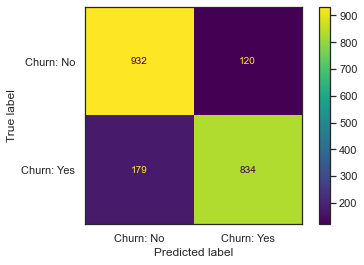

In [129]:
# Confusion Matrix
plot_confusion_matrix(clf_svm, 
                      X_test_scaled, 
                      y_test, 
                      display_labels=["Churn: No", "Churn: Yes"])

In [130]:
def print_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")
    elif train==False:
        pred = clf.predict(X_val)
        clf_report = pd.DataFrame(classification_report(y_val, pred, output_dict=True))
        print("Test Result:n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: n {confusion_matrix(y_val, pred)}n")

model = SVC(kernel='rbf', random_state=100, C=100, gamma=0.0001)
model.fit(X_train, y_train)
print_score(model, X_train, y_train, X_val, y_val, train=True)
print_score(model, X_train, y_train, X_val, y_val, train=False)

Train Result:n================================================
Accuracy Score: 84.53%
_______________________________________________
CLASSIFICATION REPORT:n                     0            1  accuracy    macro avg  weighted avg
precision     0.881909     0.815466  0.845297     0.848687      0.848530
recall        0.795670     0.894458  0.845297     0.845064      0.845297
f1-score      0.836573     0.853137  0.845297     0.844855      0.844894
support    4111.000000  4150.000000  0.845297  8261.000000   8261.000000
_______________________________________________
Confusion Matrix: n [[3271  840]
 [ 438 3712]]n
Test Result:n================================================
Accuracy Score: 84.21%
_______________________________________________
CLASSIFICATION REPORT:n                    0            1  accuracy    macro avg  weighted avg
precision    0.867110     0.822719  0.842131     0.844915      0.843979
recall       0.791709     0.888476  0.842131     0.840092      0.842131
f1-score  

## 4. Improve Model

In [131]:
# Optimize Parameters with Cross Validation and GridSearchCv()
num_features = np.size(X_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]
## NOTE: We are includeing C=1 and gamma=1/(num_features * X_train_scaled.var())
## as possible choices since they are the default values.
## ALSO NOTE: Because X_train_scaled.var() = 1 [remember, X_train_scaled = scale(X_train)],
## 1/(num_features * X_train_scaled.var()) = 1/num_features

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(X_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


C:\Users\kornc\Documents\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



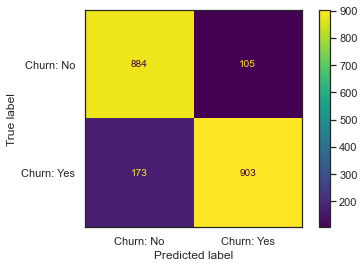

In [133]:
# Building, Evaluating, Drawing, and Interpreting the Final Support Vector Machine
clf_svm = SVC(random_state=100, C=1000, gamma=0.0001)
clf_svm.fit(X_val_scaled, y_val)

plot_confusion_matrix(clf_svm, 
                      X_val_scaled , 
                      y_val, 
                      display_labels=["Churn: No", "Churn: Yes"])

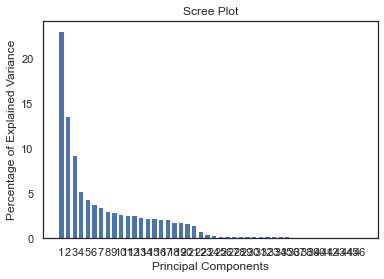

In [134]:
pca = PCA() # NOTE: By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree Plot')
plt.show()

In [135]:
train_pc1_coords = X_train_pca[:, 0] 
train_pc2_coords = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now center and scale the PCs...
pca_train_scaled = scale(np.column_stack((train_pc1_coords, train_pc2_coords)))

## Now we optimize the SVM fit to the x and y-axis coordinates
## of the data after PCA dimension reduction...
num_features = np.size(pca_train_scaled, axis=1)
param_grid = [
  {'C': [1, 10, 100, 1000], 
   'gamma': [1/num_features, 1, 0.1, 0.01, 0.001, 0.0001], 
   'kernel': ['rbf']},
]

optimal_params = GridSearchCV(
        SVC(), 
        param_grid,
        cv=5,
        scoring='roc_auc', # NOTE: The default value for scoring results in worse performance...
        ## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        verbose=0 # NOTE: If you want to see what Grid Search is doing, set verbose=2
    )

optimal_params.fit(pca_train_scaled, y_train)
print(optimal_params.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


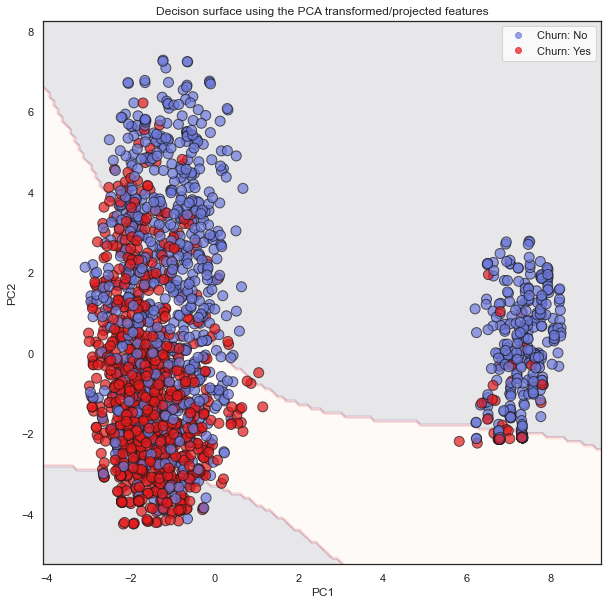

In [136]:
clf_svm = SVC(random_state=100, C=10, gamma=0.01)
clf_svm.fit(pca_train_scaled, y_train)

## Transform the test dataset with the PCA...
X_test_pca = pca.transform(X_test_scaled)
test_pc1_coords = X_test_pca[:, 0] 
test_pc2_coords = X_test_pca[:, 1]

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = test_pc1_coords.min() - 1
x_max = test_pc1_coords.max() + 1

y_min = test_pc2_coords.min() - 1
y_max = test_pc2_coords.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#6e7adb','#e41a1c'])
## now draw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 

scatter = ax.scatter(test_pc1_coords, test_pc2_coords, c=y_test, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("Churn: No")
legend.get_texts()[1].set_text("Churn: Yes")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
## plt.savefig('svm.png')
plt.show()

In [137]:
pred = model.predict(X_train)
clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
model = SVC(kernel='rbf', random_state=100, C=10, gamma=0.01)
model.fit(X_train, y_train)
print("Train Result:n================================================")
print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: n {confusion_matrix(y_train, pred)}n")

Train Result:n================================================
Accuracy Score: 84.53%
_______________________________________________
CLASSIFICATION REPORT:n                     0            1  accuracy    macro avg  weighted avg
precision     0.881909     0.815466  0.845297     0.848687      0.848530
recall        0.795670     0.894458  0.845297     0.845064      0.845297
f1-score      0.836573     0.853137  0.845297     0.844855      0.844894
support    4111.000000  4150.000000  0.845297  8261.000000   8261.000000
_______________________________________________
Confusion Matrix: n [[3271  840]
 [ 438 3712]]n


In [138]:
pred = model.predict(X_val)
clf_report = pd.DataFrame(classification_report(y_val, pred, output_dict=True))
model = SVC(kernel='rbf', random_state=100, C=10, gamma=0.01)
model.fit(X_val, y_val)
print("Train Result:n================================================")
print(f"Accuracy Score: {accuracy_score(y_val, pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: n {confusion_matrix(y_val, pred)}n")

Train Result:n================================================
Accuracy Score: 97.43%
_______________________________________________
CLASSIFICATION REPORT:n                    0            1  accuracy    macro avg  weighted avg
precision    0.987500     0.962896  0.974334     0.975198      0.974680
recall       0.958544     0.988848  0.974334     0.973696      0.974334
f1-score     0.972807     0.975699  0.974334     0.974253      0.974314
support    989.000000  1076.000000  0.974334  2065.000000   2065.000000
_______________________________________________
Confusion Matrix: n [[ 948   41]
 [  12 1064]]n


In [139]:
def print_score(clf, X_train, y_train, X_test, y_test):
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    print("Test Result:n================================================")        
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:n{clf_report}")
    print("_______________________________________________")
    print(f"Confusion Matrix: n {confusion_matrix(y_test, pred)}n")

model = SVC(kernel='rbf', random_state=100, C=100, gamma=0.0001)
model.fit(X_train, y_train)

print_score(model, X_train, y_train, X_test, y_test)

Test Result:n================================================
Accuracy Score: 82.47%
_______________________________________________
CLASSIFICATION REPORT:n                     0            1  accuracy    macro avg  weighted avg
precision     0.868590     0.788308  0.824697     0.828449      0.829207
recall        0.772814     0.878578  0.824697     0.825696      0.824697
f1-score      0.817907     0.830999  0.824697     0.824453      0.824330
support    1052.000000  1013.000000  0.824697  2065.000000   2065.000000
_______________________________________________
Confusion Matrix: n [[813 239]
 [123 890]]n
